In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


import plotly.express as px

In [2]:
veri = pd.read_csv('illness_dataset.csv')
veri.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [3]:
veri.shape

(150000, 6)

In [4]:
veri.columns

Index(['Number', 'City', 'Gender', 'Age', 'Income', 'Illness'], dtype='object')

In [5]:
from pandas_profiling import ProfileReport
veri.profile_report()

C:\Users\samiy\AppData\Local\Temp\ipykernel_17332\2767105420.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
veri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Number   150000 non-null  int64  
 1   City     150000 non-null  object 
 2   Gender   150000 non-null  object 
 3   Age      150000 non-null  int64  
 4   Income   150000 non-null  float64
 5   Illness  150000 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [7]:
veri.nunique(axis=0)

Number     150000
City            8
Gender          2
Age            41
Income      71761
Illness         2
dtype: int64

In [8]:
veri.describe()

,Number,Age,Income
count,150000.000000,150000.000000,150000.000000
mean,75000.500000,44.950200,91252.798273
std,43301.414527,11.572486,24989.500948
min,1.000000,25.000000,-654.000000
25%,37500.750000,35.000000,80867.750000
50%,75000.500000,45.000000,93655.000000
75%,112500.250000,55.000000,104519.000000
max,150000.000000,65.000000,177157.000000


In [9]:
veri.isna().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

In [10]:
veri['City'].value_counts()

New York City      50307
Los Angeles        32173
Dallas             19707
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
Name: City, dtype: int64

In [11]:
byGender_count = veri['Gender'].value_counts().reset_index().rename(columns = {'Gender':'Count','index':'Gender'})

fig = px.pie(data_frame = byGender_count,
             values = 'Count',
             names = 'Gender',
             color_discrete_sequence = px.colors.qualitative.Safe,
             title = 'Distribution of Gender in the Dataset')

fig.update_traces(textposition ='outside',
                  textinfo = 'label+percent',
                  pull = [0.05] * 2)

fig.update_layout(paper_bgcolor = 'cornsilk',
                  legend_title = 'Gender',
                  uniformtext_minsize=18,
                  uniformtext_mode='hide',
                  font = dict(
                      family = "Courier New, monospace",
                      size = 18,
                      color = 'black'
                  ))

fig.show()

In [12]:
gender_city = veri.groupby(['Gender','City']).count().reset_index()

fig = px.bar(data_frame = gender_city, 
             x = 'City', y = 'Number',
             color = 'Gender', barmode = 'group',
             text = 'Number', height = 550)

fig.update_layout(title = 'Number of Male and Female in different Cities',
                  yaxis_title = 'Count',
                  legend_title = 'Gender',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_xaxes(tickangle=45)

fig.show()

In [13]:
gender_illness = veri.groupby(['Gender','Illness']).count().reset_index()

fig = px.bar(data_frame = gender_illness, 
             x = 'Gender', y = 'Number',
             color = 'Illness', barmode = 'group',
             text = 'Number', color_discrete_sequence = px.colors.qualitative.Safe)

fig.update_layout(title = 'Number of Male and Female reported Illness',
                  yaxis_title = 'Count',
                  legend_title = 'Illness?',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')


fig.show()

In [14]:
illness_city = veri.groupby(['Illness','City']).count().reset_index()


fig = px.bar(data_frame = illness_city, 
             x = 'City', y = 'Number',
             color = 'Illness', barmode = 'group',
             text = 'Number',
             color_discrete_sequence = px.colors.qualitative.Set2, height = 550)

fig.update_layout(title = 'Illness in different Cities',
                  yaxis_title = 'Count',
                  legend_title = 'Illness?',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')


fig.update_xaxes(tickangle=45)

fig.show()

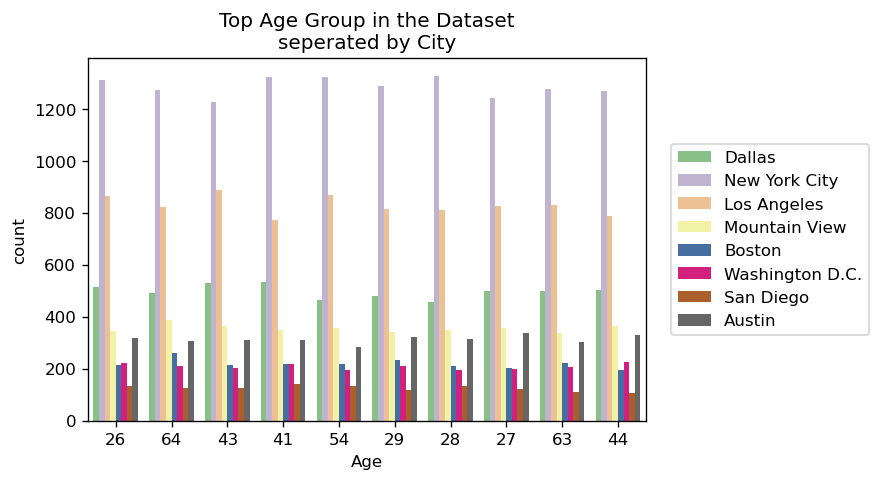

In [15]:
fig, ax = plt.subplots(dpi=120)

fig = sns.countplot(data = veri, x = 'Age', hue = 'City',
              order = veri['Age'].value_counts().iloc[:10].index,
              palette = 'Accent')
fig.set_title("Top Age Group in the Dataset\nseperated by City")
plt.legend(loc = 'center right',bbox_to_anchor = (1.40,0.5), borderaxespad = 0)
plt.show()

In [16]:
age_illness = veri.groupby(['Age','Illness']).count().reset_index()
age_illness.head()

,Age,Illness,Number,City,Gender,Income
0,25,No,1715,1715,1715,1715
1,25,Yes,153,153,153,153
2,26,No,3600,3600,3600,3600
3,26,Yes,318,318,318,318
4,27,No,3478,3478,3478,3478


In [17]:
fig = px.bar(data_frame = age_illness,
             x = 'Age', y = 'Number',color = 'Illness')

fig.update_layout(title = 'Age Group and Illness',
                  yaxis_title = 'Count',
                  legend_title = 'Illness?',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.show()

In [18]:
fig = px.bar(data_frame = age_illness[age_illness['Age'] <= 30],
             x = 'Age', y = 'Number', color = 'Illness',
             barmode = 'group', text = 'Number', height = 550)

fig.update_layout(title = 'Age Group (before 30) and Illness',
                  yaxis_title = 'Count',
                  legend_title = 'Illness?',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

In [19]:
fig = px.bar(data_frame = age_illness[(age_illness['Age'] <= 60) & (age_illness['Age'] >= 45)],
             x = 'Age', y = 'Number', color = 'Illness',
             barmode = 'group', text = 'Number', height = 550)

fig.update_layout(title = 'Age Group (45-60) and Illness',
                  yaxis_title = 'Count',
                  legend_title = 'Illness?',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

In [20]:
veri['Income'].mean()

91252.79827333333

In [21]:
print("Female average income:",veri[veri['Gender'] == 'Female']['Income'].mean())
print("Male average income:",veri[veri['Gender'] == 'Male']['Income'].mean())

Female average income: 85660.92184290031
Male average income: 95670.24719570405


In [22]:
avr_income_cities = veri.groupby('City').mean().reset_index()

def define_status(income):
    if income > avr_income_cities['Income'].quantile(0.75):
        return 'green'
    elif avr_income_cities['Income'].quantile(0.75) > income >= avr_income_cities['Income'].quantile(0.5):
        return 'lightgreen'
    elif avr_income_cities['Income'].quantile(0.5) > income >= avr_income_cities['Income'].quantile(0.25):
        return 'orange'
    else:
        return 'red'

avr_income_cities['Color Coded'] = avr_income_cities['Income'].apply(lambda income: define_status(income))
avr_income_cities.head()

,City,Number,Age,Income,Color Coded
0,Austin,143854.5,44.651237,90277.513423,orange
1,Boston,120557.0,45.197807,91554.571497,orange
2,Dallas,9854.0,45.058761,45252.231187,red
3,Los Angeles,86101.0,44.994094,95264.155410,lightgreen
4,Mountain View,109297.0,44.992756,135078.415782,green


In [23]:
fig = px.bar(data_frame = avr_income_cities,
             x = 'City', y = 'Income', text = 'Income',
             height = 550)

fig.update_layout(title = 'Average Income in different Cities',
                  yaxis_title = 'Income (US Dollar)',
                  legend_title = 'Company Name',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',
                  marker_color = avr_income_cities['Color Coded'].to_list()
                  )

fig.update_xaxes(tickangle=45)

fig.show()

In [24]:
fig = px.bar(data_frame = veri.groupby(['Gender','City']).mean().reset_index(),
             x = 'Gender', y = 'Income', color = 'City',
             barmode = 'group', text = 'Income', height = 550)

fig.update_layout(title = 'Male and Female Average Income in different Cities',
                  yaxis_title = 'Income (US Dollar)',
                  legend_title = 'Company Name',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

In [25]:
veri2 = veri.copy()

def status(income):
    if income <= 80867.750000:
        return 'Below 25'
    elif 80867.750000 < income <= 93655.000000:
        return 'Between 25 and 50'
    elif 93655.000000 < income <= 104519.000000:
        return 'Between 50 and 75'
    else:
        return 'Above 75'

veri2['Income Status'] = veri2['Income'].apply(lambda income: status(income))
veri2.head()

,Number,City,Gender,Age,Income,Illness,Income Status
0,1,Dallas,Male,41,40367.0,No,Below 25
1,2,Dallas,Male,54,45084.0,No,Below 25
2,3,Dallas,Male,42,52483.0,No,Below 25
3,4,Dallas,Male,40,40941.0,No,Below 25
4,5,Dallas,Male,46,50289.0,No,Below 25


In [26]:
fig = px.bar(data_frame = veri2.groupby(['Gender','Income Status']).count().reset_index(),
             x = 'Income Status', y = 'Number', color = 'Gender',
             barmode = 'group', text = 'Income', height = 550,
             color_discrete_sequence = px.colors.qualitative.Vivid,
             category_orders = {"Income Status": ['Below 25','Between 25 and 50','Between 50 and 75','Above 75']})

fig.update_layout(title = 'Male and Female Income in different Percentile',
                  yaxis_title = 'Count',
                  legend_title = 'Gender',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.show()

In [27]:
fig = px.bar(data_frame = veri2.groupby(['City','Income Status']).count().reset_index(),
             x = 'Income Status', y = 'Number', color = 'City',
             barmode = 'group', text = 'Income', height = 550,
             color_discrete_sequence = px.colors.qualitative.Pastel,
             category_orders = {"Income Status": ['Below 25','Between 25 and 50','Between 50 and 75','Above 75']})

fig.update_layout(title = 'Different Cities Income in different Percentile',
                  yaxis_title = 'Count',
                  legend_title = 'City',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

fig.show()

In [28]:
fig = px.bar(data_frame = veri2.groupby(['Illness','Income Status']).count().reset_index(),
             x = 'Income Status', y = 'Number', color = 'Illness',
             barmode = 'group', text = 'Income', height = 550,
             color_discrete_sequence = px.colors.qualitative.Pastel,
             category_orders = {"Income Status": ['Below 25','Between 25 and 50','Between 50 and 75','Above 75']})

fig.update_layout(title = 'Illness and Income in different Percentile',
                  yaxis_title = 'Count',
                  legend_title = 'Illness?',
                  font = dict(family = "Courier New, monospace",
                              size = 14, color = 'black')
                  )

fig.update_traces(texttemplate='%{text:.2s}',textposition='outside')

fig.show()

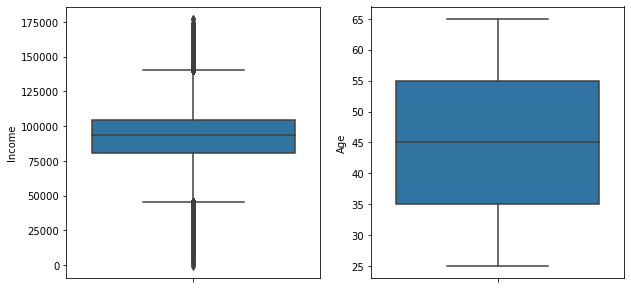

In [29]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs = axs.flatten()
sns.boxplot(y=veri['Income'],ax=axs[0])
sns.boxplot(y=veri['Age'],ax=axs[1])
plt.show()

In [30]:
veri[['Age', 'Income']].agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Age,0.005365,-1.196020
Income,-0.333642,0.520425


In [31]:
veri.drop(columns = ['Number'], axis = 1, inplace = True) #Gereksiz sütun çıkarılması
veri.head()

,City,Gender,Age,Income,Illness
0,Dallas,Male,41,40367.0,No
1,Dallas,Male,54,45084.0,No
2,Dallas,Male,42,52483.0,No
3,Dallas,Male,40,40941.0,No
4,Dallas,Male,46,50289.0,No


In [32]:
veri['Age'] = pd.qcut(veri['Age'], 5)  #Binning işlemi veriyi daha sade eğitim için daha hızlı hale getiriyor.

In [33]:
veri = pd.get_dummies(veri, columns=['City', 'Gender','Age']) #Numeric yapma
veri = pd.get_dummies(veri, columns=['Illness'], drop_first=True) #Output Illness olduğu için iki tane sütun oluşmasını engeller drop_first
#Tek sütun aynı bilgiyi veriyor zaten.
veri.head()

,Income,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male,"Age_(24.999, 33.0]","Age_(33.0, 41.0]","Age_(41.0, 49.0]","Age_(49.0, 57.0]","Age_(57.0, 65.0]",Illness_Yes
0,40367.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
1,45084.0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
2,52483.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
3,40941.0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0
4,50289.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


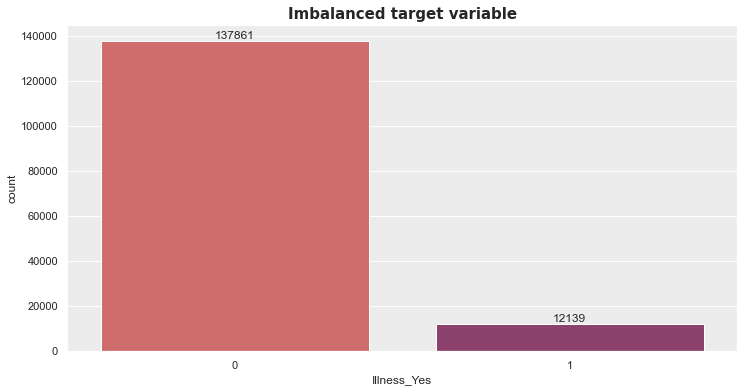

In [34]:
X = veri.drop('Illness_Yes', axis=1) 
y = veri['Illness_Yes']

sns.set(rc={'axes.facecolor':'#ECECEC'})
plt.figure(figsize=(12,6))
plt.title("Imbalanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=veri['Illness_Yes'], data=veri, palette="flare")

abs_values = veri['Illness_Yes'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values) 

plt.show()                                                                                

In [35]:
from imblearn.over_sampling import SMOTE #Bu sefer Smote işlemi ile veriyi dengeledim

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

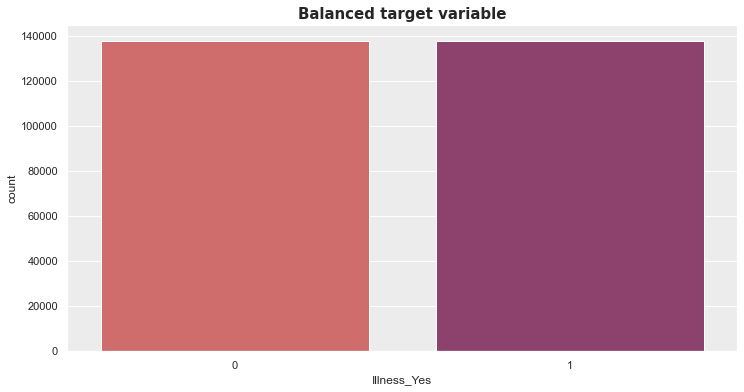

In [36]:
sns.set(rc={'axes.facecolor':'#ECECEC'}) 
plt.figure(figsize=(12,6))
plt.title("Balanced target variable", fontsize=15, fontweight='bold', fontname='Helvetica', ha='center')
ax = sns.countplot(x=y_resampled, data=veri, palette="flare")
plt.show()

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = (model.predict(X_test) >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_pred)

print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90     27249
           1       1.00      0.77      0.87     27896

    accuracy                           0.88     55145
   macro avg       0.91      0.89      0.88     55145
weighted avg       0.91      0.88      0.88     55145



In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

param_grid = {'poly__degree': [1, 2]}

pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('model', LinearRegression())
])

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

best_degree = grid_search.best_params_['poly__degree']
best_score = grid_search.best_score_
print("En iyi derece (degree):", best_degree)

best_poly = PolynomialFeatures(degree=best_degree)
X_train_poly = best_poly.fit_transform(X_train)
X_test_poly = best_poly.transform(X_test)

best_model = LinearRegression()
best_model.fit(X_train_poly, y_train)

y_pred = best_model.predict(X_test_poly)

threshold = 0.5
y_pred = (y_pred >= threshold).astype(int)

accuracy1 = accuracy_score(y_test, y_pred)

print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi derece (degree): 2
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     27249
           1       1.00      0.86      0.93     27896

    accuracy                           0.93     55145
   macro avg       0.94      0.93      0.93     55145
weighted avg       0.94      0.93      0.93     55145



In [42]:
from sklearn.linear_model import LogisticRegression

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}

model = LogisticRegression()

grid_search = GridSearchCV(model, param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy2 = accuracy_score(y_test, y_pred)

print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi parametreler: {'C': 0.01}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     27249
           1       1.00      0.86      0.93     27896

    accuracy                           0.93     55145
   macro avg       0.94      0.93      0.93     55145
weighted avg       0.94      0.93      0.93     55145



In [44]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy3 = accuracy_score(y_test, y_pred)

print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94     27249
           1       0.96      0.92      0.94     27896

    accuracy                           0.94     55145
   macro avg       0.94      0.94      0.94     55145
weighted avg       0.94      0.94      0.94     55145



In [45]:
from sklearn.svm import SVC

svm_classifier = SVC(random_state=42)

svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)

accuracy4 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     27249
           1       1.00      0.86      0.93     27896

    accuracy                           0.93     55145
   macro avg       0.94      0.93      0.93     55145
weighted avg       0.94      0.93      0.93     55145



In [46]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("En iyi parametreler:", grid_search.best_params_)

best_nb_model = grid_search.best_estimator_

y_pred = best_nb_model.predict(X_test)

accuracy5 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

En iyi parametreler: {'var_smoothing': 1e-09}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84     27249
           1       0.85      0.84      0.85     27896

    accuracy                           0.84     55145
   macro avg       0.84      0.84      0.84     55145
weighted avg       0.84      0.84      0.84     55145



In [47]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("En iyi parametreler: ", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

accuracy6 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))

En iyi parametreler:  {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     27249
           1       0.97      0.92      0.94     27896

    accuracy                           0.94     55145
   macro avg       0.94      0.94      0.94     55145
weighted avg       0.94      0.94      0.94     55145



In [48]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=LogisticRegression()
)

stacking_model.fit(X_train, y_train)

y_pred = stacking_model.predict(X_test)

accuracy7 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     27249
           1       0.98      0.91      0.94     27896

    accuracy                           0.94     55145
   macro avg       0.94      0.94      0.94     55145
weighted avg       0.94      0.94      0.94     55145



In [49]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report

model1 = RandomForestClassifier(n_estimators=100, random_state=42)
model2 = GradientBoostingClassifier(n_estimators=100, random_state=42)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)

pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)

meta_model = LogisticRegression()

X_blend = np.column_stack((pred1, pred2))
meta_model.fit(X_blend, y_test)

y_pred = meta_model.predict(X_blend)

accuracy8 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.92      0.92      0.92     27249
           1       0.92      0.92      0.92     27896

    accuracy                           0.92     55145
   macro avg       0.92      0.92      0.92     55145
weighted avg       0.92      0.92      0.92     55145



In [50]:
from sklearn.ensemble import BaggingClassifier

base_model = DecisionTreeClassifier()

bagging_model = BaggingClassifier(base_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

y_pred = bagging_model.predict(X_test)

accuracy9 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.92      0.93      0.92     27249
           1       0.93      0.92      0.92     27896

    accuracy                           0.92     55145
   macro avg       0.92      0.92      0.92     55145
weighted avg       0.92      0.92      0.92     55145



In [51]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_classifier = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

accuracy10 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     27249
           1       0.97      0.92      0.94     27896

    accuracy                           0.94     55145
   macro avg       0.94      0.94      0.94     55145
weighted avg       0.94      0.94      0.94     55145



In [52]:
from sklearn.ensemble import ExtraTreesClassifier

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

et_classifier = ExtraTreesClassifier(random_state=42)

grid_search = GridSearchCV(et_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_et_classifier = grid_search.best_estimator_
y_pred = best_et_classifier.predict(X_test)

accuracy11 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

En iyi parametreler: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.91      0.98      0.95     27249
           1       0.98      0.91      0.94     27896

    accuracy                           0.94     55145
   macro avg       0.95      0.94      0.94     55145
weighted avg       0.95      0.94      0.94     55145



In [53]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_classifier = AdaBoostClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(adaboost_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_adaboost_classifier = grid_search.best_estimator_
y_pred = best_adaboost_classifier.predict(X_test)

accuracy12 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

En iyi parametreler: {'learning_rate': 1.0, 'n_estimators': 100}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     27249
           1       1.00      0.86      0.93     27896

    accuracy                           0.93     55145
   macro avg       0.94      0.93      0.93     55145
weighted avg       0.94      0.93      0.93     55145



In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(gb_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_gb_classifier = grid_search.best_estimator_
y_pred = best_gb_classifier.predict(X_test)

accuracy13 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

En iyi parametreler: {'learning_rate': 1.0, 'max_depth': 4, 'n_estimators': 50}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     27249
           1       0.99      0.87      0.93     27896

    accuracy                           0.93     55145
   macro avg       0.94      0.93      0.93     55145
weighted avg       0.94      0.93      0.93     55145



In [55]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(xgb_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_xgb_classifier = grid_search.best_estimator_
y_pred = best_xgb_classifier.predict(X_test)

accuracy14 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

En iyi parametreler: {'learning_rate': 1.0, 'max_depth': 4, 'n_estimators': 150}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.89      0.99      0.93     27249
           1       0.99      0.88      0.93     27896

    accuracy                           0.93     55145
   macro avg       0.94      0.93      0.93     55145
weighted avg       0.94      0.93      0.93     55145



In [56]:
from lightgbm import LGBMClassifier

lgbm_classifier = LGBMClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [3, 4, 5]
}

grid_search = GridSearchCV(lgbm_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_lgbm_classifier = grid_search.best_estimator_
y_pred = best_lgbm_classifier.predict(X_test)

accuracy15 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

[LightGBM] [Info] Number of positive: 73310, number of negative: 73741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 147051, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498535 -> initscore=-0.005862
[LightGBM] [Info] Start training from score -0.005862
[LightGBM] [Info] Number of positive: 73310, number of negative: 73741
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004498 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 147051, number of used features: 16
[LightGBM] [Info] 

In [57]:
from catboost import CatBoostClassifier, Pool

catboost_classifier = CatBoostClassifier(random_state=42, verbose=0)

train_pool = Pool(X_train, label=y_train)

param_grid = {
    'iterations': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'depth': [3, 4, 5]
}

grid_search = GridSearchCV(catboost_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("En iyi parametreler:", best_params)

best_catboost_classifier = grid_search.best_estimator_
y_pred = best_catboost_classifier.predict(X_test)

accuracy16 = accuracy_score(y_test, y_pred)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred, zero_division=1))

En iyi parametreler: {'depth': 5, 'iterations': 150, 'learning_rate': 1.0}
Sınıflandırma Raporu:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93     27249
           1       1.00      0.86      0.93     27896

    accuracy                           0.93     55145
   macro avg       0.94      0.93      0.93     55145
weighted avg       0.94      0.93      0.93     55145



In [61]:
from tensorflow import keras

input_dim = X_train.shape[1]
num_classes = len(np.unique(y))

model = keras.Sequential([
    keras.layers.Input(shape=(input_dim,)),  
    keras.layers.Dense(64, activation='relu'), 
    keras.layers.Dense(32, activation='relu'),  
    keras.layers.Dense(num_classes, activation='sigmoid')  
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

accuracy17 = accuracy_score(y_test, y_pred_classes)
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred_classes))

Epoch 1/10
5515/5515 [==============================] - 5s 882us/step - loss: 0.2210 - accuracy: 0.9285 - val_loss: 0.2076 - val_accuracy: 0.9322
Epoch 2/10
5515/5515 [==============================] - 5s 832us/step - loss: 0.2090 - accuracy: 0.9316 - val_loss: 0.2073 - val_accuracy: 0.9322
Epoch 3/10
5515/5515 [==============================] - 5s 845us/step - loss: 0.2082 - accuracy: 0.9316 - val_loss: 0.2073 - val_accuracy: 0.9322
Epoch 4/10
5515/5515 [==============================] - 5s 820us/step - loss: 0.2079 - accuracy: 0.9316 - val_loss: 0.2072 - val_accuracy: 0.9322
Epoch 5/10
5515/5515 [==============================] - 4s 815us/step - loss: 0.2077 - accuracy: 0.9316 - val_loss: 0.2063 - val_accuracy: 0.9322
Epoch 6/10
5515/5515 [==============================] - 4s 810us/step - loss: 0.2075 - accuracy: 0.9316 - val_loss: 0.2063 - val_accuracy: 0.9322
Epoch 7/10
5515/5515 [==============================] - 5s 883us/step - loss: 0.2073 - accuracy: 0.9316 - val_loss: 0.2066 -

In [62]:
models = {
    "Linear Regression": accuracy,
    "Polynomial Regression": accuracy1,
    "Logistic Regression": accuracy2,
    "K-Nearest Neighbors": accuracy3,
    "Support Vector Machine": accuracy4,
    "Naive Bayes": accuracy5,
    "Decision Tree": accuracy6,
    "Stacking": accuracy7,
    "Blending": accuracy8,
    "Bagging": accuracy9,
    "Random Forest": accuracy10,
    "ExtraTreesClassifier": accuracy11,
    "AdaBoost": accuracy12,
    "Gradient Boosting Machine": accuracy13,
    "XGBoost": accuracy14,
    "LightGMB": accuracy15,
    "CatBoost": accuracy16,
    "Deep Learning": accuracy17,
}

In [63]:
accuracy_df = pd.DataFrame(list(models.items()), columns=["Model", "Accuracy"])
accuracy_df

,Model,Accuracy
0,Linear Regression,0.884704
1,Polynomial Regression,0.929713
2,Logistic Regression,0.929713
3,K-Nearest Neighbors,0.940829
4,Support Vector Machine,0.929713
5,Naive Bayes,0.843957
6,Decision Tree,0.943023
7,Stacking,0.941826
8,Blending,0.916656
9,Bagging,0.923565


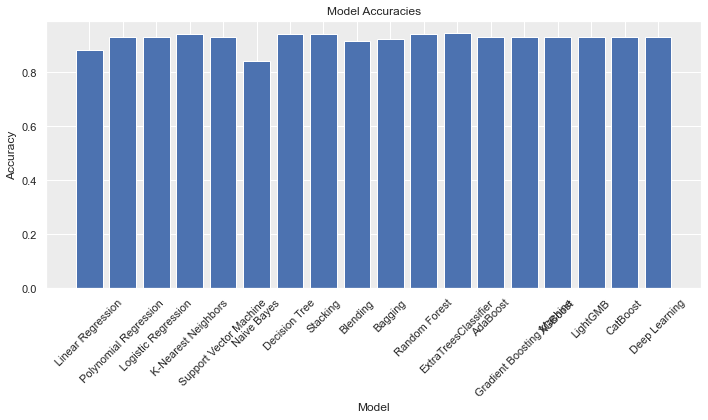

In [64]:
plt.figure(figsize=(10, 6))
plt.bar(accuracy_df["Model"], accuracy_df["Accuracy"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()